In [1]:
pwd

u'/home/riddhisw/Documents/2017/Scripts_Git/v0/NOTES_v0 _1/tex/fig_main/scripts'

In [2]:
import sys
import matplotlib
sys.path.append('../../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet
% matplotlib inline

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [3]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_'
figname='AKF_vs_LSF_v1'

#### Figure: LSF and AKF for Msmt Noise Filtering ####

In [4]:
## Data
test_case_list = [19, 19, 19, 19]
variation_list = [9, 1, 5, 8]
case_labels = ['(a) 0.1% Noise', '(b) 1% Noise', '(c) 10% Noise', '(d) 25% Noise']

In [5]:
import matplotlib.transforms as mtransforms
from plot_tools.plot_figstyle_sheet import color_pallete # these are the agreed colors for the paper

In [6]:
# This calculates the Bayes Risk ratio for AKF relative to LSF for all test_cases

dummy = []
for idx_count in xrange(len(test_case_list)):
    dummy.append(get_Kalman_LSF_difference('AKF',test_case_list[idx_count], variation_list[idx_count], 
                                           datapath, give_ratio=1))
    
ratio_matrix = np.array(dummy)

# We get a unit ratio when AKF and LSF are of equivalent performance
theta = 1.0

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 9
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 1
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 8


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 9
(19, 9)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 1
(19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
(19, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 8
(19, 8)


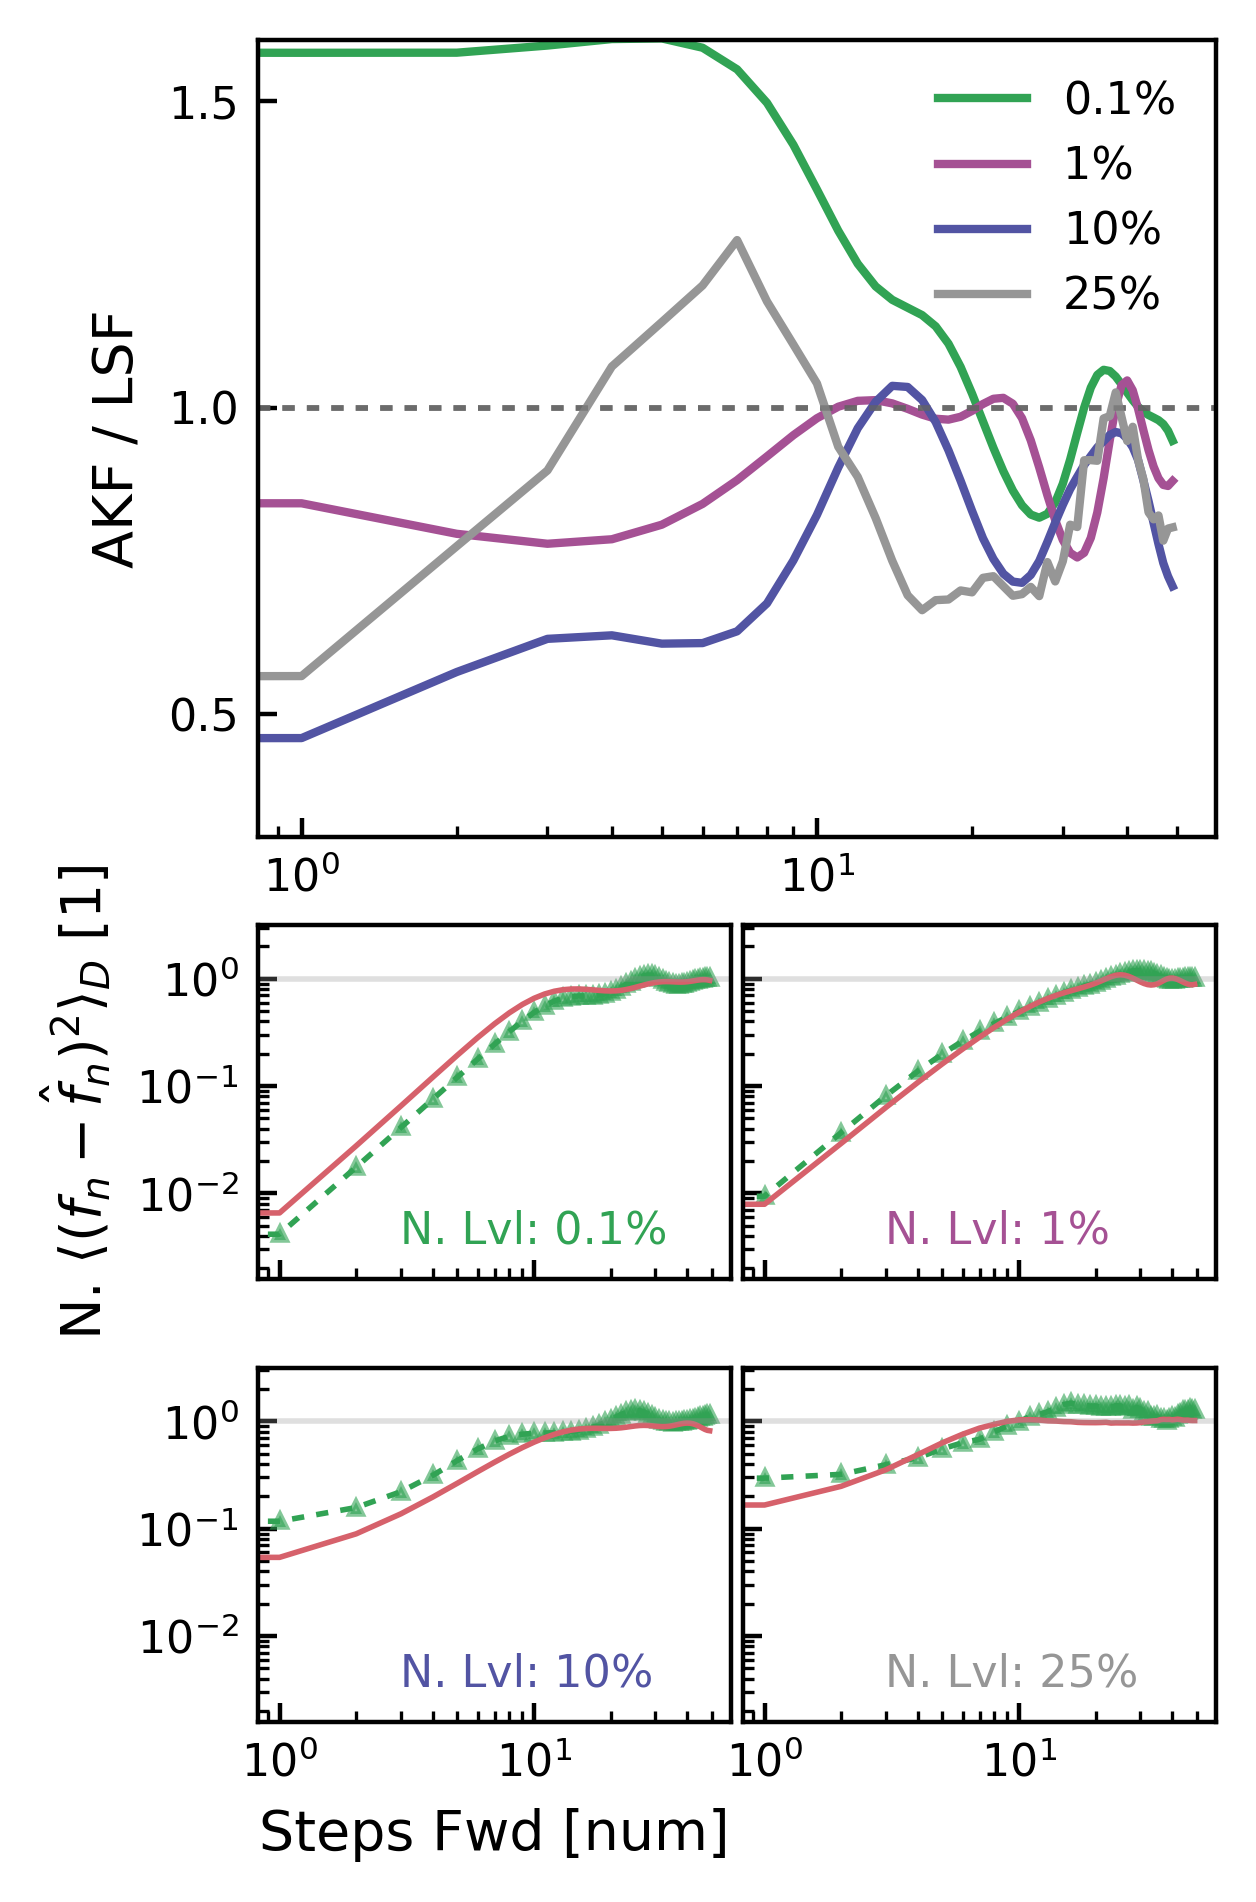

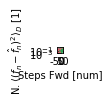

In [7]:
## Fig Type - A

case_labels_A = ['0.1%', '1% ', '10%', '25%']
nrows = 4
ncols = 2

# The top 2x2 subplots will be merged to present the ratio of LSF / AKF performance v. measurement noise strength
# The bottom 2x2 plots will be used to present the Bayes Risk trajectories for each testcase


gs = gridspec.GridSpec(nrows, ncols,
                       left=0.21, right=0.99, 
                       top=0.99, bottom=0.1, 
                       wspace=0.025, hspace=0.25)

fig2 = plt.figure(figsize=(cm2inch(7.8), cm2inch(12)), dpi=my_dpi)

# Figure placement
top =  fig2.add_subplot(gs[0:2, 0:2])
btm1 = fig2.add_subplot(gs[2, 0])
btm2 = fig2.add_subplot(gs[2, 1])
btm3 = fig2.add_subplot(gs[3, 0])
btm4 = fig2.add_subplot(gs[3, 1])
btm_plots = [btm1, btm2, btm3, btm4]

# Dumping ground  for un-needed axes from automated plotting tools.
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

# Formatting  for "top"
top.set_xscale('log')
top.set_ylim([0.3, 1.6])
top.tick_params(labelsize=fsize, direction='in', which='both')
top.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=3))
top.yaxis.set_major_locator( MaxNLocator(nbins = 3) )
# top.set(ylabel='', yticklabels=[])
# top.set(xlabel='Steps Fwd [num]')
top.set(ylabel='AKF / LSF')
top = set_font_sizes(top, fsize, Fsize)

selected_c = [28, 17, 1, 37]

for idx_c in xrange(len(test_case_list)):
    
    top.plot(range(50), ratio_matrix[idx_c, :], c=color_pallete[selected_c[idx_c]], label=case_labels_A[idx_c])
    top.legend(loc=1,  fontsize=fsize, frameon=False)#, bbox_to_anchor=(0., 1.02, 1., .102), 
           #ncol=4, mode="expand", borderaxespad=0.)
    
    
    ax = btm_plots[idx_c]
    dumpax, ax = pnm(dumpax, ax,  ['LSF', 'AKF'], 
                    test_case_list[idx_c], variation_list[idx_c], 
                    datapath, GPRP_load='No',
                    fstep=50, sstep=50, lowloss=20, 
                    ylim = [-2.8, 0.5], yscale='log')
    ax = set_font_sizes(ax, fsize, Fsize)
    ax.tick_params(labelsize=fsize, direction='in', which='both')
    ax.text(0.3, 0.1, 'N. Lvl: ' +case_labels_A[idx_c], fontsize=fsize, transform=ax.transAxes, 
            color=color_pallete[selected_c[idx_c]])
    
    top.axhline(theta, color=color_pallete[36], linestyle=':', lw=1, alpha=0.5)
    
    if idx_c == 0:
        ax.set(xlabel='', xticklabels=[])
    if idx_c == 1:
        ax.set(ylabel='', yticklabels=[], xlabel='', xticklabels=[])
    if idx_c == 2:
        ax.set(ylabel='')
    if idx_c == 3:
        ax.set(xlabel='', ylabel='', yticklabels=[])
fig2.savefig(savefig+figname+'_A.svg', format='svg')
plt.show()
plt.close()

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 9
(19, 9)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 1
(19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
(19, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 8
(19, 8)


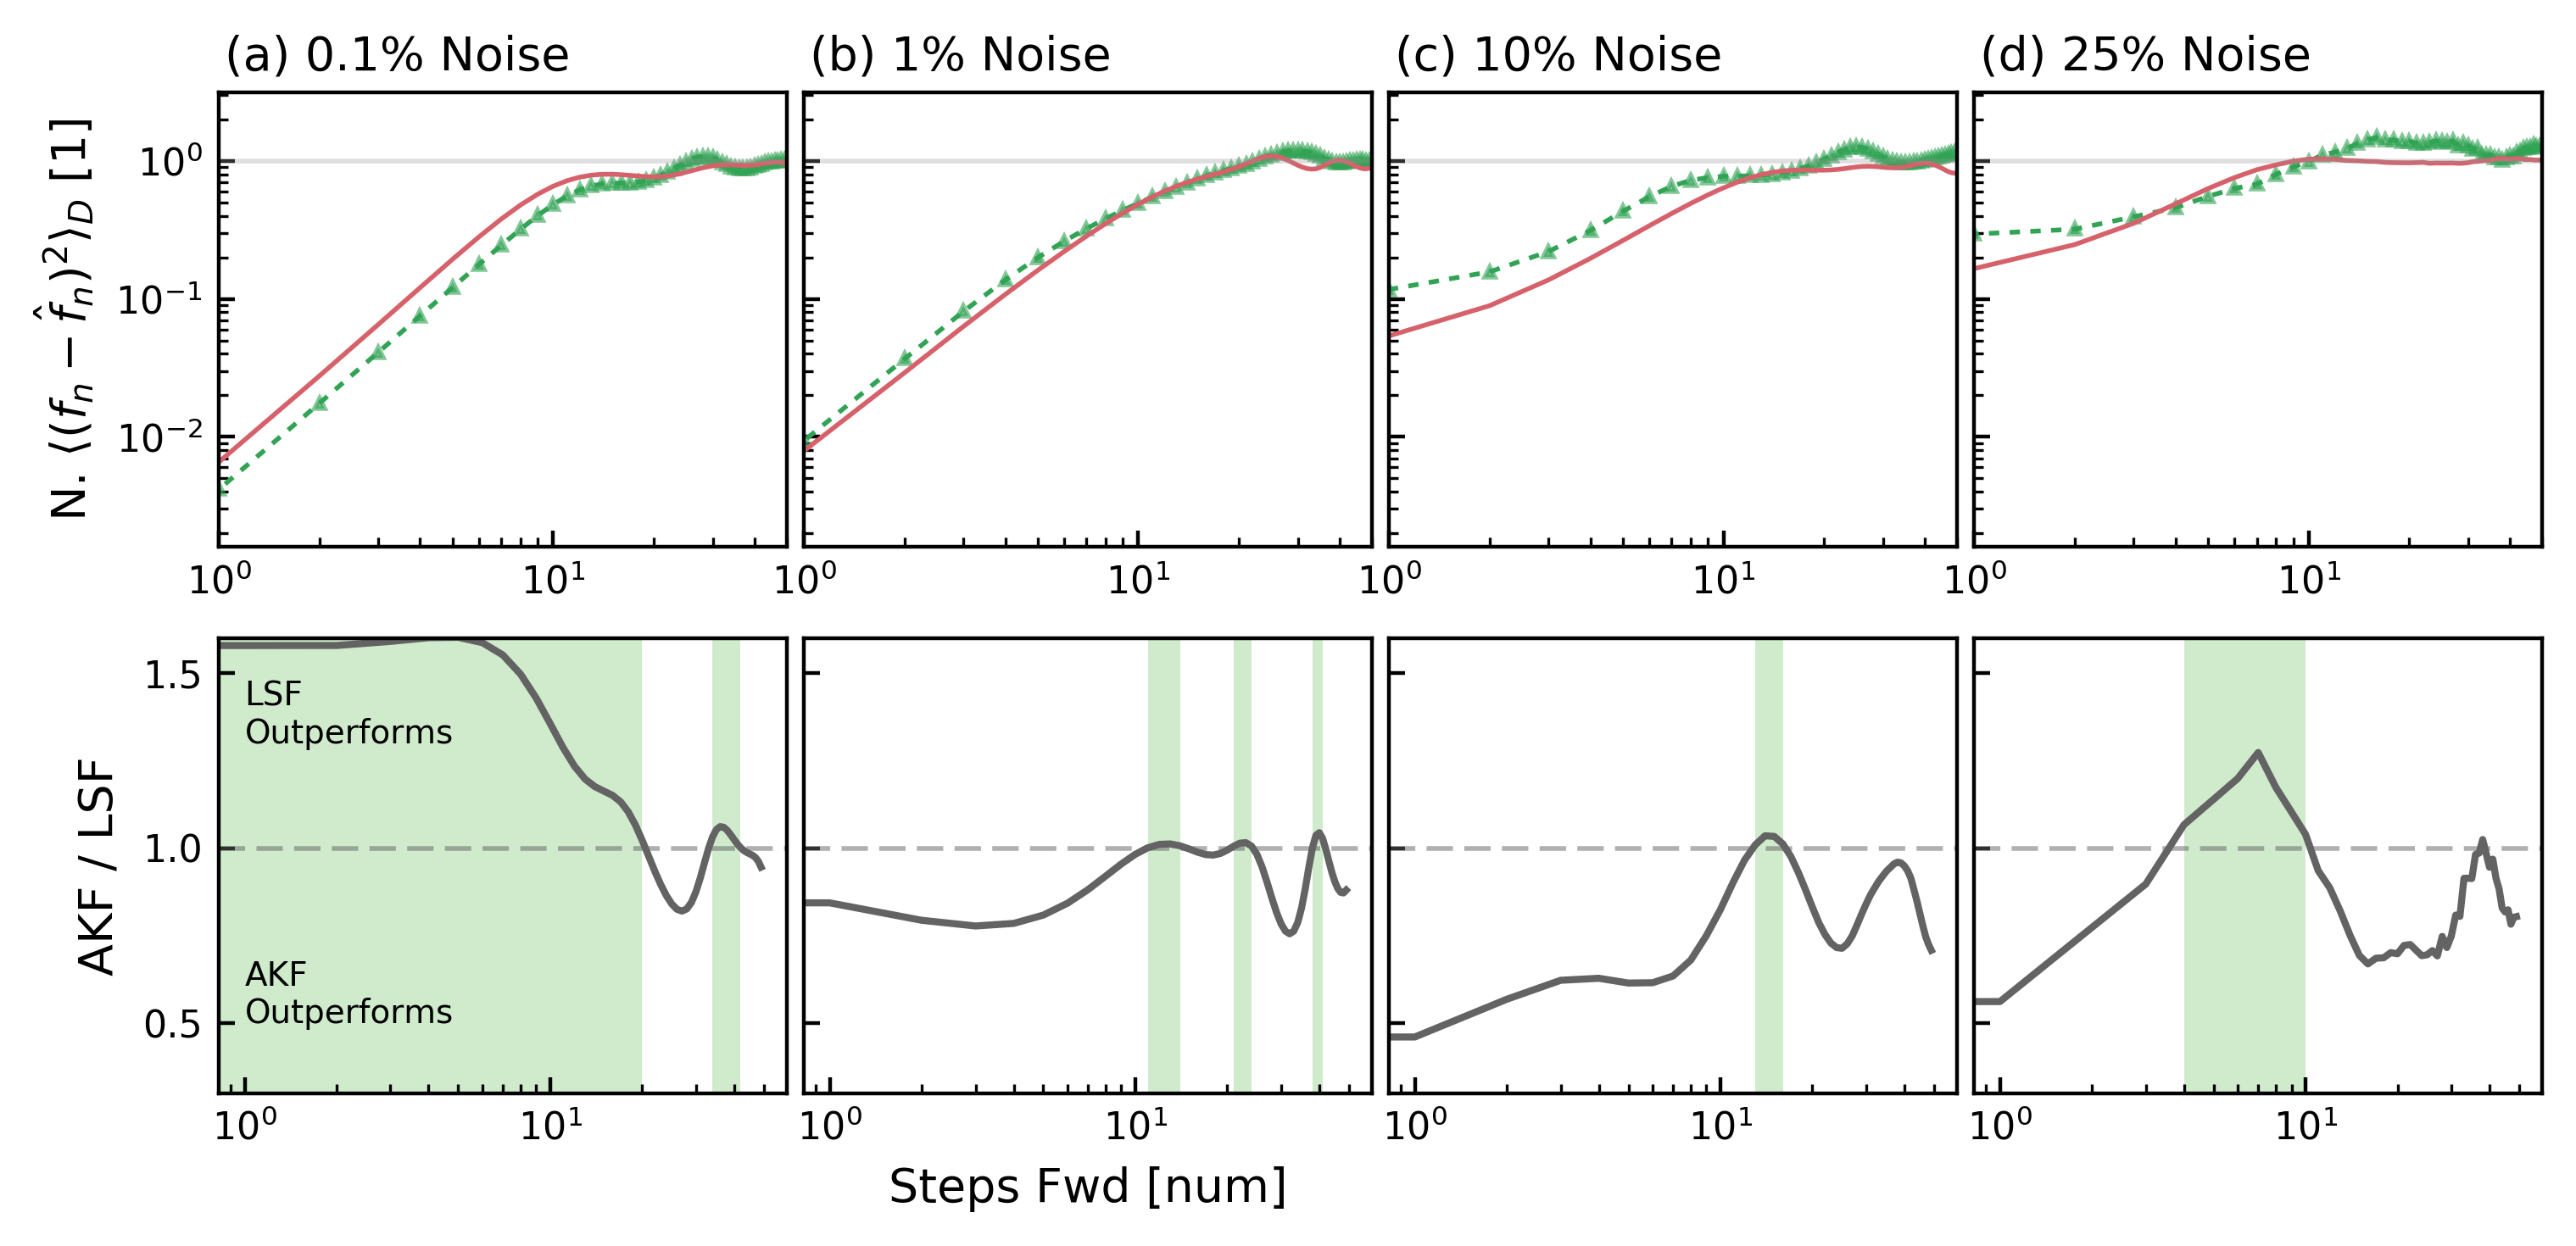

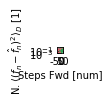

In [8]:
## Fig Type - B

nrows = 2 # types of graphs
ncols = 4 # number of test cases

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.1, right=0.97, 
                       top=0.9, bottom=0.15, 
                       wspace=0.03, hspace=0.2)

fig = plt.figure(figsize=(cm2inch(20), cm2inch(10)), dpi=my_dpi)

# This code segment plots the second row 
for idx_c in xrange(ncols):
    
    vars()['ax_ratio'+str(idx_c)] = fig.add_subplot(gs[1, idx_c])
    vars()['ax_ratio'+str(idx_c)].plot(range(50), ratio_matrix[idx_c, :], c=color_pallete[36])

    trans = mtransforms.blended_transform_factory(vars()['ax_ratio'+str(idx_c)].transData, vars()['ax_ratio'+str(idx_c)].transAxes)
    vars()['ax_ratio'+str(idx_c)].axhline(theta, color=color_pallete[36], linestyle='--', lw=1, alpha=0.5)
    vars()['ax_ratio'+str(idx_c)].fill_between(range(50), 0, 1, where=ratio_matrix[idx_c, :] > theta, 
                                               facecolor=color_pallete[30], alpha=0.5, transform=trans)
    
    vars()['ax_ratio'+str(idx_c)] = set_font_sizes(vars()['ax_ratio'+str(idx_c)], fsize, Fsize)
    vars()['ax_ratio'+str(idx_c)].set_xscale('log')
    vars()['ax_ratio'+str(idx_c)].set_ylim([0.3, 1.6])
    
    vars()['ax_ratio'+str(idx_c)].xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=3))
    vars()['ax_ratio'+str(idx_c)].yaxis.set_major_locator( MaxNLocator(nbins = 3) )
    

    
    if idx_c !=0:
        vars()['ax_ratio'+str(idx_c)].set(ylabel='', yticklabels=[])
    if idx_c == 1:
        vars()['ax_ratio'+str(idx_c)].set(xlabel='Steps Fwd [num]')
    if idx_c == 0:
        vars()['ax_ratio'+str(idx_c)].set(ylabel='AKF / LSF')
    
    vars()['ax_ratio'+str(idx_c)] = set_font_sizes(vars()['ax_ratio'+str(idx_c)], fsize, Fsize)
    

# This code segment plots the first row 
## cb.ax.set_xticklabels([r'KF'+"\n"+'min. Risk', r'$0$', r'LSF'+"\n"+'min. Risk'], fontsize=7)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax_list = [ax1, ax2, ax3, ax4]

dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

for idx_case in xrange(ncols):
    
    ax = ax_list[idx_case]
    
    dumpax, ax = pnm(dumpax, ax,  ['LSF', 'AKF'], 
                    test_case_list[idx_case], variation_list[idx_case], 
                    datapath, GPRP_load='No',
                    fstep=50, sstep=50, lowloss=20, 
                    ylim = [-2.8, 0.5], yscale='log')
    
    if idx_case != 1:
        ax.set(xlabel='')
    if idx_case !=0:
        ax.set(xlabel='', ylabel='', yticklabels=[])

    ax.set_xlim([0, 50])
    ax.text(0.01, 1.05, case_labels[idx_case], fontsize=Fsize, transform=ax.transAxes)
    ax = set_font_sizes(ax, fsize, Fsize)
    
    vars()['ax_ratio'+str(idx_case)].tick_params(labelsize=fsize, direction='in', which='both')
    
vars()['ax_ratio'+str(0)].text(1, 1.3, r'LSF'+"\n"+'Outperforms', fontsize=7)
vars()['ax_ratio'+str(0)].text(1, 0.5, r'AKF'+"\n"+'Outperforms', fontsize=7)
    
fig.savefig(savefig+figname+'.svg', format='svg')
plt.show()
plt.close()